In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize']=20,8
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
#for spyder we should change plotly default to browser
#import plotly.io as pio
#pio.renderers.default = "browser"

import folium

pyo.init_notebook_mode(connected=True)
cf.go_offline()


In [2]:
df=pd.read_excel(r"C:/Users/DELL/Desktop/MACHINE LEARNING PROJECTS/COVID19 DATA ANALYSIS/Covid cases in India.xlsx")

df.drop(['S. No.'],axis=1,inplace=True)

df['Total Cases']=df['Total Confirmed cases (Indian National)']+df['Total Confirmed cases ( Foreign National )']

total_cases_overall=df['Total Cases'].sum()
print('The total number of cases till now in india is ',total_cases_overall)

df['Active Cases']=df['Total Cases']-(df['Death']+df['Cured'])

df.style.background_gradient(cmap='Reds')

Total_Active_cases=df.groupby('Name of State / UT')['Active Cases'].sum().sort_values(ascending=False).to_frame()

Total_Active_cases.style.background_gradient(cmap='Reds')


The total number of cases till now in india is  729


,Active Cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


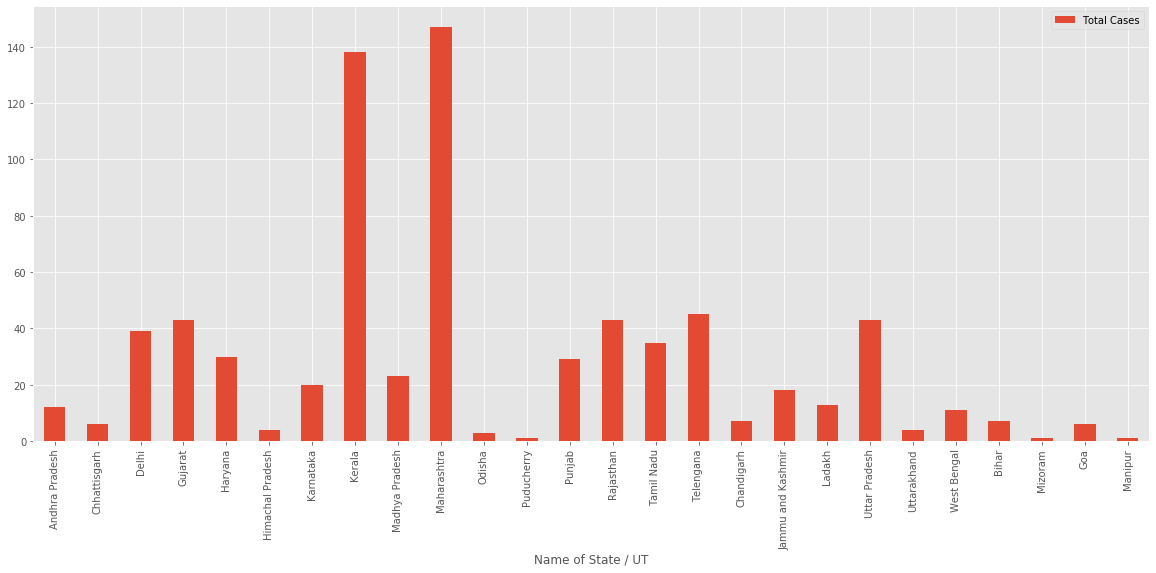

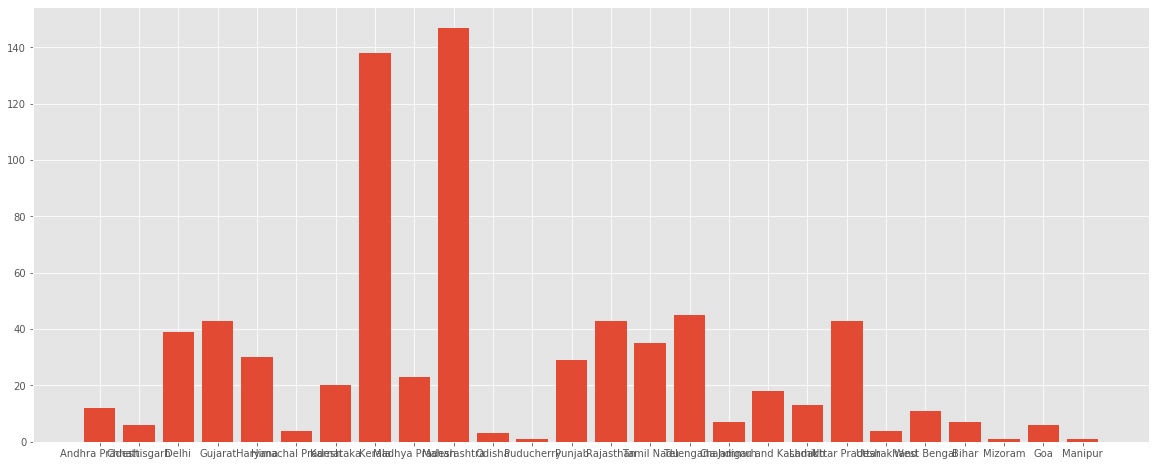

In [3]:
##########Graphical Presentation ##########
#pandas visualisation

df.plot(kind='bar',x='Name of State / UT',y='Total Cases')
plt.show()

#plotly vis
df.iplot(kind='bar',x='Name of State / UT',y='Total Cases')

#matplotlib vis
plt.bar(df['Name of State / UT'],df['Total Cases'])

#plotly express
px.bar(df,x='Name of State / UT',y='Total Cases')


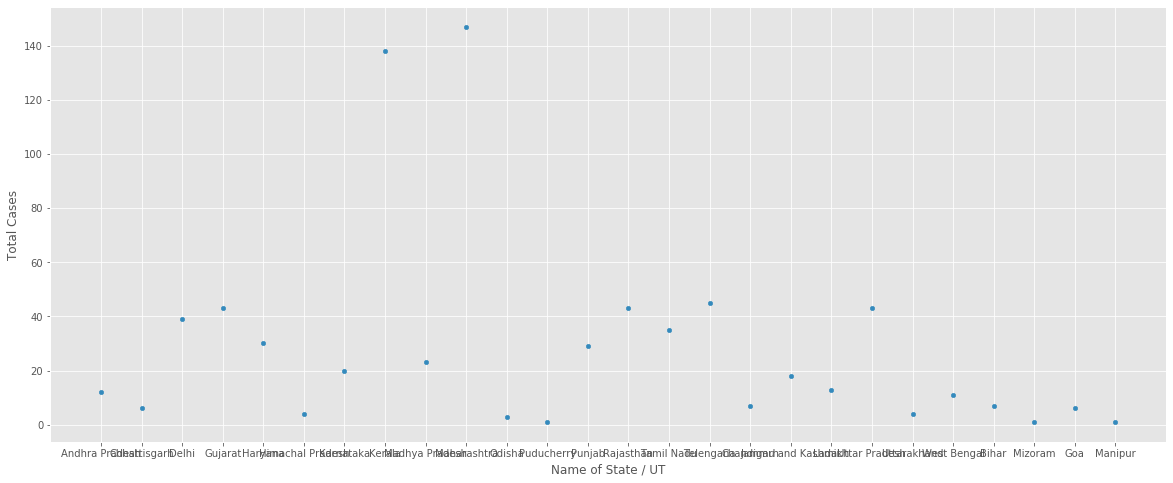

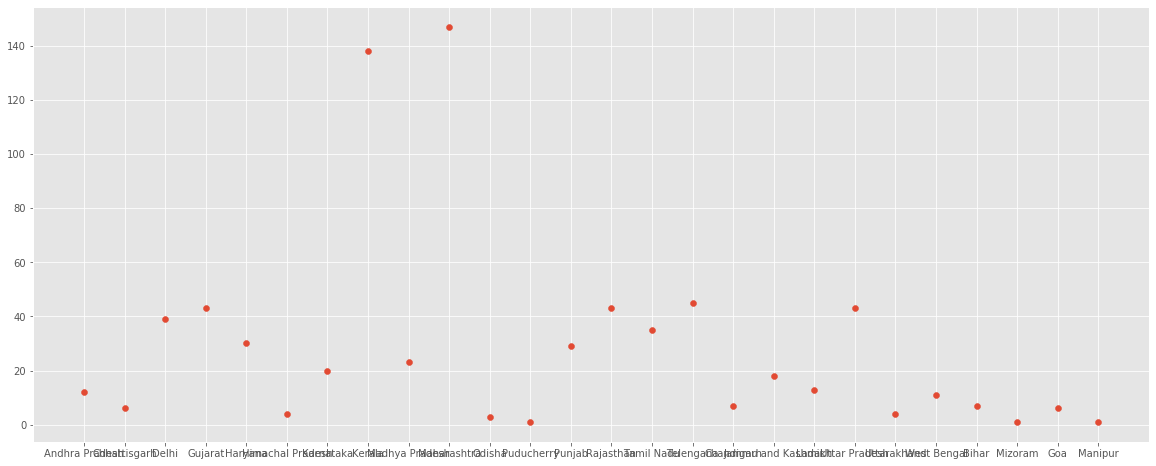

In [4]:
############scatter plot##########
#pandas visualisation

df.plot(kind='scatter',x='Name of State / UT',y='Total Cases')
plt.show()

#matplotlib vis
plt.scatter(df['Name of State / UT'],df['Total Cases'])

#plotly vis
df.iplot(kind='scatter',x='Name of State / UT',y='Total Cases',mode='markers+lines',title='My Graph',xTitle='names of states',yTitle='count')

#plotly express
px.scatter(df,x='Name of State / UT',y='Total Cases')


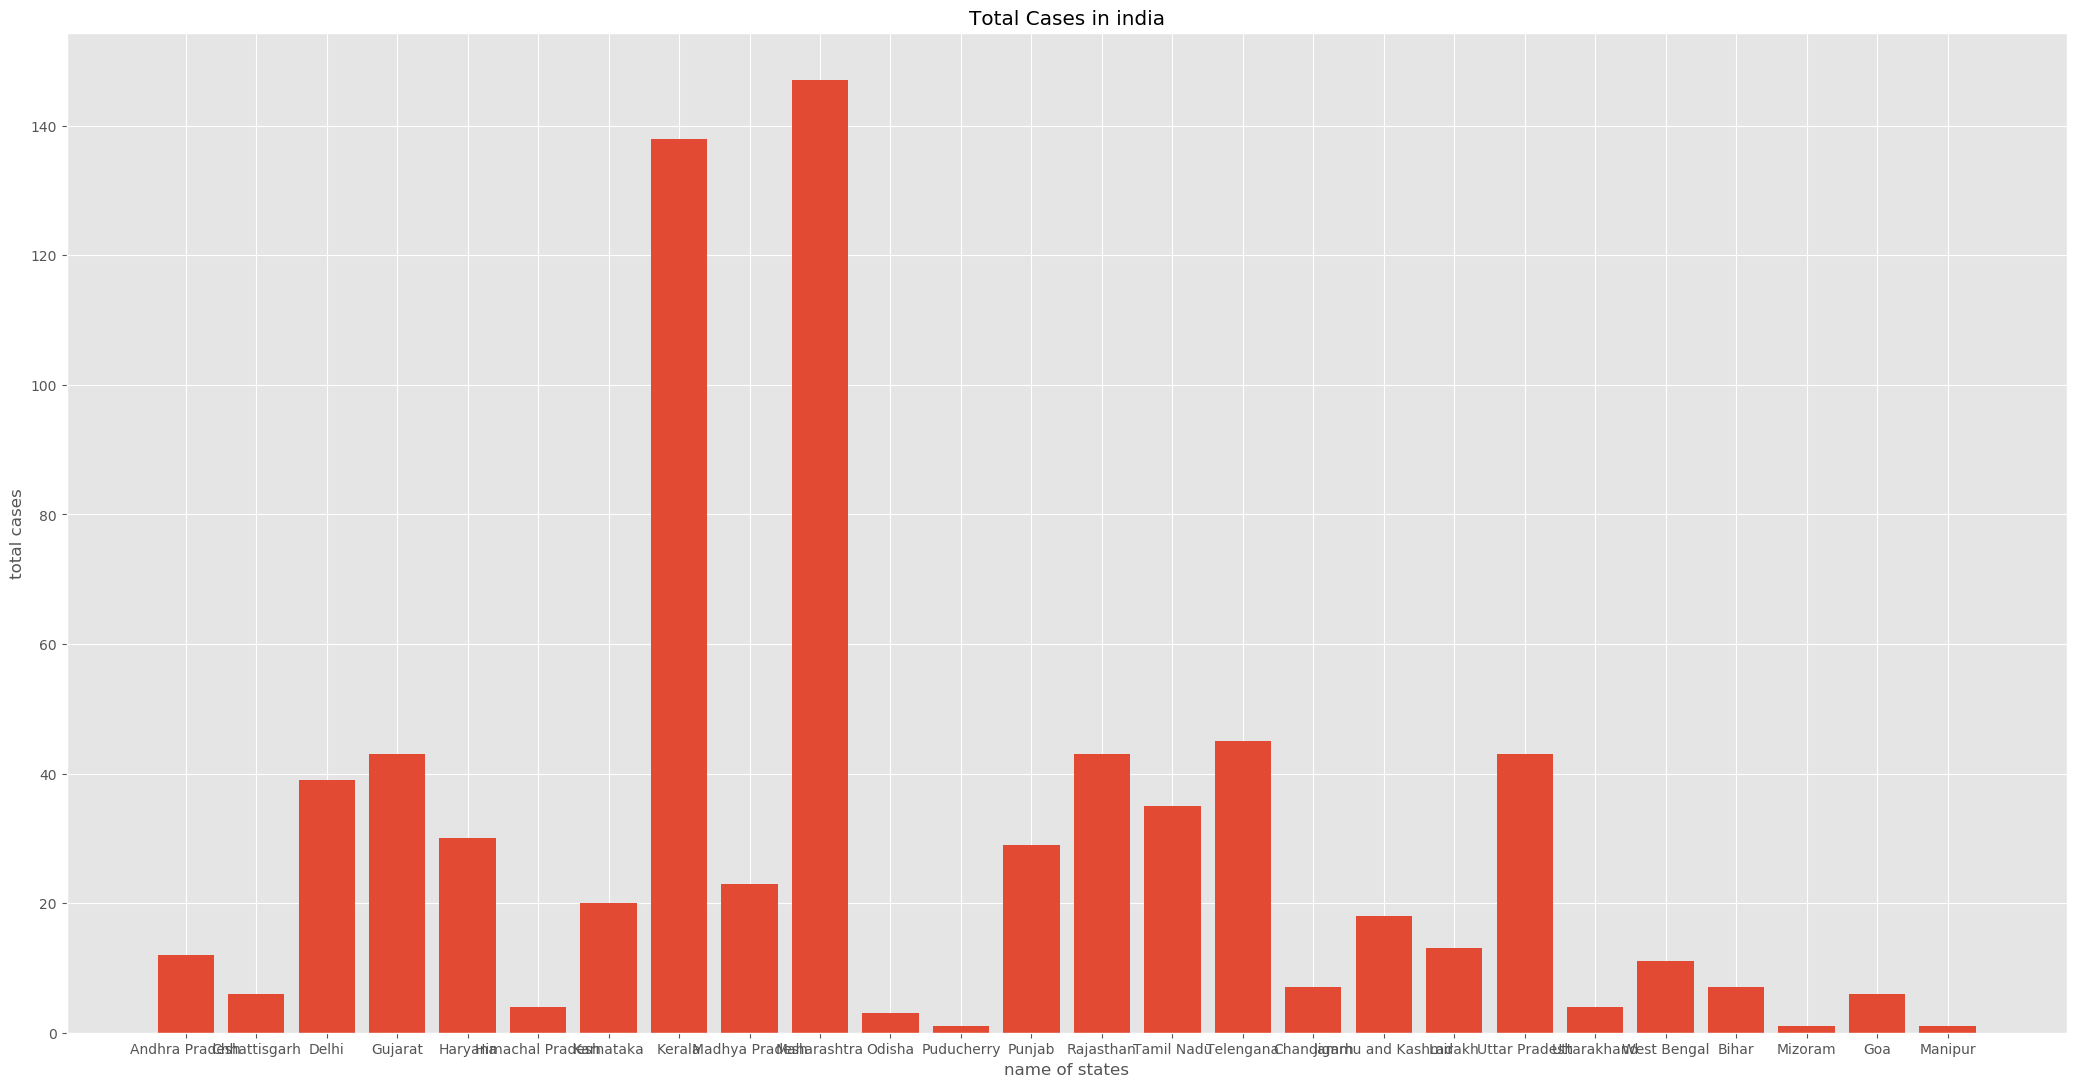

In [5]:
#########oo vis#########
#matplot lib
fig=plt.figure(figsize=(20,10),dpi=100)
axes=fig.add_axes([0,0,1,1])
axes.bar(df['Name of State / UT'],df['Total Cases'])
axes.set_title("Total Cases in india")
axes.set_xlabel("name of states")
axes.set_ylabel("total cases")
plt.show()

#plotly vis
fig=go.Figure()
fig.add_trace(go.Bar(x=df['Name of State / UT'],y=df['Total Cases']))
fig.update_layout(title='total cases in india',xaxis=dict(title='Name of States'),yaxis=dict(title='count'))


In [8]:
############indian map##############

Indian_Cord=pd.read_excel(r"C:/Users/DELL/Desktop/MACHINE LEARNING PROJECTS/COVID19 DATA ANALYSIS/Indian Coordinates.xlsx")

df_full=pd.merge(Indian_Cord,df,on='Name of State / UT')

map=folium.Map(location=[20,70],zoom_start=4,tiles='Stamenterrain')
for lat,long,value, name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total Cases'],df_full['Name of State / UT']):
    folium.CircleMarker([lat,long],radius=value*0.8,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases</strong>: ' + str(value)+ '<br>'),color='red',fill_color='red',fill_opacity=0.3).add_to(map)

In [9]:
map

In [10]:
#########how corona virus is rising globally#############
dbd_india=pd.read_excel(r"C:/Users/DELL/Desktop/MACHINE LEARNING PROJECTS/COVID19 DATA ANALYSIS/per_day_cases.xlsx",parse_dates=True,sheet_name="India")
dbd_italy=pd.read_excel(r"C:/Users/DELL/Desktop/MACHINE LEARNING PROJECTS/COVID19 DATA ANALYSIS/per_day_cases.xlsx",parse_dates=True,sheet_name="Italy")
dbd_korea=pd.read_excel(r"C:/Users/DELL/Desktop/MACHINE LEARNING PROJECTS/COVID19 DATA ANALYSIS/per_day_cases.xlsx",parse_dates=True,sheet_name="Korea")
dbd_wuhan=pd.read_excel(r"C:/Users/DELL/Desktop/MACHINE LEARNING PROJECTS/COVID19 DATA ANALYSIS/per_day_cases.xlsx",parse_dates=True,sheet_name="Wuhan")


Text(0.5, 1.0, 'confirmed cases in india')

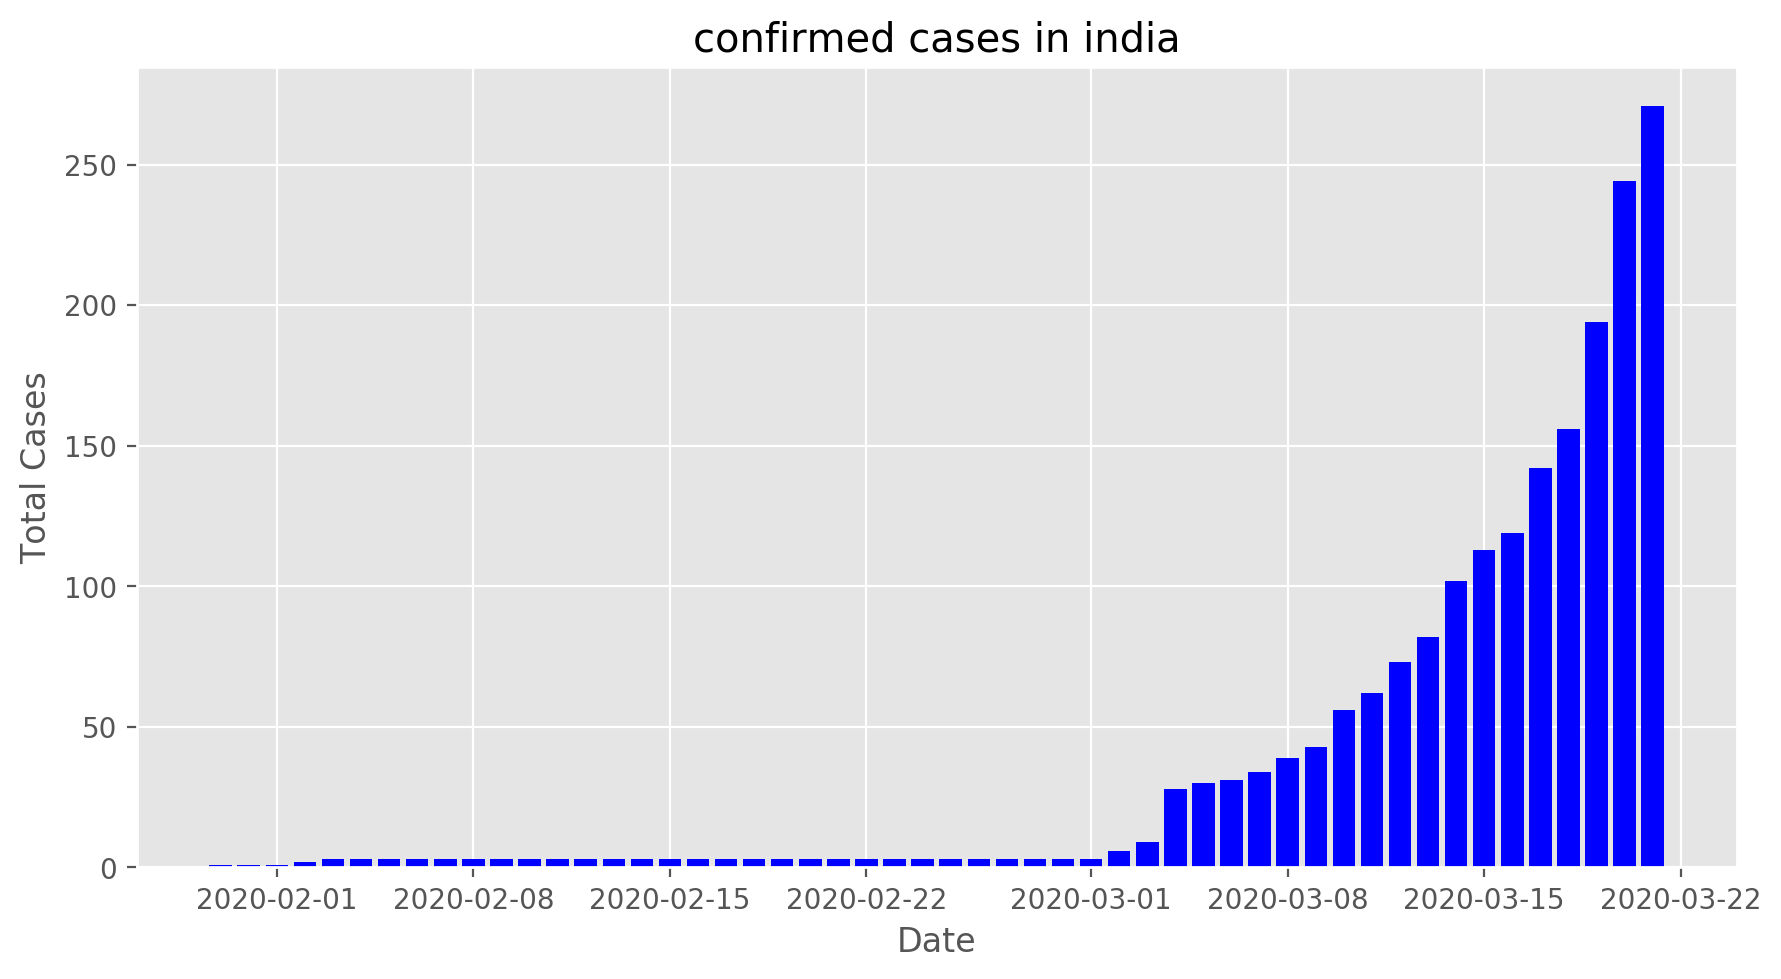

In [11]:
#matplotlib vis
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(dbd_india["Date"],dbd_india["Total Cases"],color='blue')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("confirmed cases in india")


In [12]:
#plotly express
fig=px.bar(dbd_india,x="Date",y="Total Cases",color='Total Cases',title='confirmed cases in india',)
fig.show()

fig=px.bar(dbd_italy,x="Date",y="Total Cases",color='Total Cases',title='confirmed cases in italy',)
fig.show()

fig=px.bar(dbd_korea,x="Date",y="Total Cases",color='Total Cases',title='confirmed cases in korea',)
fig.show()

fig=px.bar(dbd_wuhan,x="Date",y="Total Cases",color='Total Cases',title='confirmed cases in wuhan',)
fig.show()



Text(0.5, 1.0, 'confirmed cases in india')

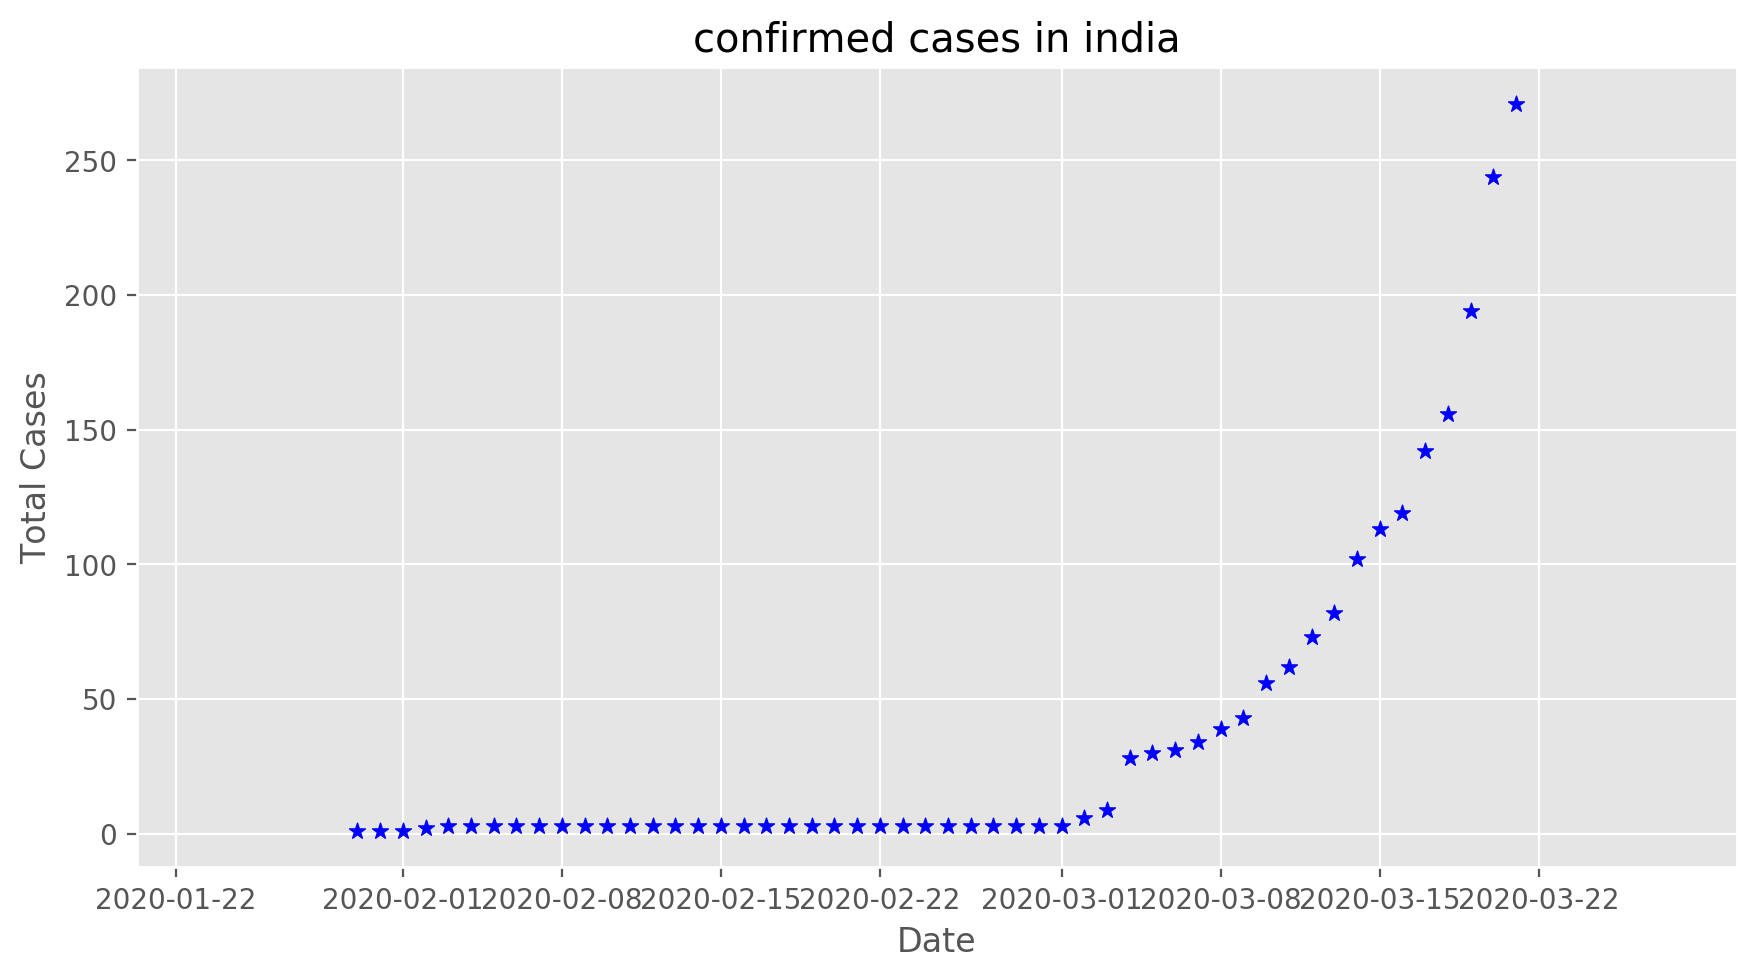

In [15]:
############scatter plot############
#matplotlib vis
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.scatter(dbd_india["Date"],dbd_india["Total Cases"],color='blue',marker='*')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("confirmed cases in india")


In [14]:
#plotly express
fig=px.scatter(dbd_india,x="Date",y="Total Cases",color='Total Cases',title='confirmed cases in india',)
fig.show()

fig=px.scatter(dbd_italy,x="Date",y="Total Cases",color='Total Cases',title='confirmed cases in italy',)
fig.show()

fig=px.scatter(dbd_korea,x="Date",y="Total Cases",color='Total Cases',title='confirmed cases in korea',)
fig.show()

fig=px.scatter(dbd_wuhan,x="Date",y="Total Cases",color='Total Cases',title='confirmed cases in wuhan',)
fig.show()


In [19]:
#plotly
dbd_india.iplot(kind='scatter',x='Date',y='Total Cases')


In [23]:
############subplots using bar graph#################
fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S.Korea","Italy","India","Wuhan"))

fig.add_trace(go.Bar(x=dbd_korea['Date'],y=dbd_korea['Total Cases'],
                    marker=dict(color=dbd_korea['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Bar(x=dbd_italy['Date'],y=dbd_italy['Total Cases'],
                    marker=dict(color=dbd_italy['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Bar(x=dbd_india['Date'],y=dbd_india['Total Cases'],
                    marker=dict(color=dbd_india['Total Cases'],coloraxis="coloraxis")),2,1)

fig.add_trace(go.Bar(x=dbd_wuhan['Date'],y=dbd_wuhan['Total Cases'],
                    marker=dict(color=dbd_wuhan['Total Cases'],coloraxis="coloraxis")),2,2)



fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text="Total Cases in 4 Countries")

fig.update_layout(plot_bgcolor='rgb(230,230,230)')

In [26]:
#############subplots using scatter graph##############
from plotly.subplots import make_subplots
fig=make_subplots(
    rows=2,cols=2,
     specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S.Korea","Italy","India","Wuhan"))

fig.add_trace(go.Scatter(x=dbd_korea['Date'],y=dbd_korea['Total Cases'],marker=dict(color=dbd_korea['Total Cases'],coloraxis="coloraxis")),1,1)
fig.add_trace(go.Scatter(x=dbd_italy['Date'],y=dbd_italy['Total Cases'],marker=dict(color=dbd_italy['Total Cases'],coloraxis="coloraxis")),1,2)
fig.add_trace(go.Scatter(x=dbd_india['Date'],y=dbd_india['Total Cases'],marker=dict(color=dbd_india['Total Cases'],coloraxis="coloraxis")),2,1)
fig.add_trace(go.Scatter(x=dbd_wuhan['Date'],y=dbd_wuhan['Total Cases'],marker=dict(color=dbd_wuhan['Total Cases'],coloraxis="coloraxis")),2,2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text="Total Cases in 4 countries")
fig.update_layout(plot_bgcolor='rgb(230,230,230)')



In [27]:
########world corona virus###################
df=pd.read_csv('C:/Users/DELL/Desktop/MACHINE LEARNING PROJECTS/COVID19 DATA ANALYSIS/covid_19_data.csv',parse_dates=['Last Update'])
df.rename(columns={'ObservationDate':'Date','Country/Region':'Country'},inplace=True)


In [28]:
df.query('Country=="India"')


,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
430,431,01/30/2020,NaN,India,2020-01-30 16:00:00,1.0,0.0,0.0
491,492,01/31/2020,NaN,India,2020-01-31 23:59:00,1.0,0.0,0.0
547,548,02/01/2020,NaN,India,2020-01-31 08:15:00,1.0,0.0,0.0
607,608,02/02/2020,NaN,India,2020-02-02 06:03:08,2.0,0.0,0.0
672,673,02/03/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
740,741,02/04/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
810,811,02/05/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
881,882,02/06/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
954,955,02/07/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
1026,1027,02/08/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0


In [32]:
df.groupby('Date').sum()
confirmed=df.groupby('Date').sum()['Confirmed'].reset_index()
death=df.groupby('Date').sum()['Deaths'].reset_index()
rec=df.groupby('Date').sum()['Recovered'].reset_index()
confirmed
death
rec

,Date,Recovered
0,01/22/2020,28.0
1,01/23/2020,30.0
2,01/24/2020,36.0
3,01/25/2020,39.0
4,01/26/2020,52.0
5,01/27/2020,61.0
6,01/28/2020,107.0
7,01/29/2020,126.0
8,01/30/2020,143.0
9,01/31/2020,222.0


In [33]:

fig=go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'],y=confirmed['Confirmed'],mode='lines+markers',name='Confirmed',line=dict(color='blue',width=2)))
fig.add_trace(go.Scatter(x=death['Date'],y=death['Deaths'],mode='lines+markers',name='death',line=dict(color='red',width=2)))
fig.add_trace(go.Scatter(x=rec['Date'],y=rec['Recovered'],mode='lines+markers',name='rec',line=dict(color='green',width=2)))


In [34]:
##########world map############

df_confirmed=pd.read_csv(r'C:/Users/DELL/Desktop/MACHINE LEARNING PROJECTS/COVID19 DATA ANALYSIS/time_series_covid_19_confirmed.csv')
df_confirmed.rename(columns={'Country/Region':'Country'},inplace=True)
df_latlong=pd.merge(df,df_confirmed,on=['Country','Province/State'])


In [35]:
fig=px.density_mapbox(df_latlong,lat="Lat",lon="Long",hover_name="Province/State",hover_data=["Confirmed","Deaths","Recovered"],animation_frame="Date",color_continuous_scale="Portland",radius=7,zoom=0,height=700)
fig.update_layout(title='World wide corona virus cases')
fig.update_layout(mapbox_style="open-street-map",mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"b":0})